In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du fichier avec parsing des dates
df = pd.read_csv(
    "../dags/data/final/historical_weather.csv", 
    parse_dates=["date_extraction", "date_observation"]
)

print(f"Lignes : {len(df)}")
print(f"Colonnes : {len(df.columns)}")

Lignes : 10065
Colonnes : 21


In [3]:
# Aperçu des données
df.head()

,ville,date_extraction,date_observation,temperature_moy,temp_min,temp_max,humidite_moy,precipitation,vent_moyen,visibilite_moy,...,annee,mois,jour,saison,temp_ideale,peu_vent,peu_pluie,bonne_visibilite,score_meteo,periode_recommandee
0,Lyon,2025-07-04 15:22:58,2020-01-01 12:00:00,-0.1,-0.7,0.5,99,0.000,6.9,0.2,...,2020,1,1,Hiver,False,True,True,False,50,False
1,Toulouse,2025-07-04 15:22:58,2020-01-01 12:00:00,8.2,4.9,11.2,80,0.000,7.9,19.5,...,2020,1,1,Hiver,False,True,True,True,70,False
2,Nice,2025-07-04 15:22:58,2020-01-01 12:00:00,8.8,5.8,14.0,65,0.000,23.6,25.6,...,2020,1,1,Hiver,False,False,True,True,50,False
3,Paris,2025-07-04 15:22:58,2020-01-01 12:00:00,2.2,-0.7,4.5,98,0.028,10.8,1.8,...,2020,1,1,Hiver,False,True,True,False,50,False
4,Marseille,2025-07-04 15:22:58,2020-01-01 12:00:00,4.8,0.7,10.7,88,0.039,8.7,9.0,...,2020,1,1,Hiver,False,True,True,True,70,False


In [6]:
print("Types de données:")
print(df.dtypes)

print("\nValeurs manquantes:")
print(df.isnull().sum())

Types de données:
ville                          object
date_extraction        datetime64[ns]
date_observation       datetime64[ns]
temperature_moy               float64
temp_min                      float64
temp_max                      float64
humidite_moy                    int64
precipitation                 float64
vent_moyen                    float64
visibilite_moy                float64
conditions                     object
annee                           int64
mois                            int64
jour                            int64
saison                         object
temp_ideale                      bool
peu_vent                         bool
peu_pluie                        bool
bonne_visibilite                 bool
score_meteo                     int64
periode_recommandee              bool
dtype: object

Valeurs manquantes:
ville                  0
date_extraction        0
date_observation       0
temperature_moy        0
temp_min               0
temp_max               0

In [8]:
print("Stats descriptives numériques:")
display(df.describe(include='number'))

print("\nStats descriptives catégorielles:")
display(df.describe(include='object'))

Stats descriptives numériques:


,temperature_moy,temp_min,temp_max,humidite_moy,precipitation,vent_moyen,visibilite_moy,annee,mois,jour,score_meteo
count,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000
mean,14.964282,10.917448,19.284830,70.291406,1.511831,22.768395,23.646667,2022.277198,6.251366,15.691505,64.152012
std,6.924556,6.509386,7.661932,12.722200,4.996188,9.904119,8.724494,1.603808,3.435964,8.809034,19.616726
min,-3.300000,-6.100000,-1.900000,25.000000,0.000000,1.900000,0.200000,2020.000000,1.000000,1.000000,20.000000
25%,9.800000,6.100000,13.800000,61.000000,0.000000,15.900000,18.300000,2021.000000,3.000000,8.000000,50.000000
50%,14.400000,10.700000,18.800000,71.000000,0.007000,21.100000,22.800000,2022.000000,6.000000,16.000000,70.000000
75%,20.400000,15.900000,25.200000,80.000000,0.441000,27.700000,28.000000,2024.000000,9.000000,23.000000,80.000000
max,33.200000,28.100000,42.000000,100.000000,102.487000,75.100000,56.200000,2025.000000,12.000000,31.000000,100.000000



Stats descriptives catégorielles:


,ville,conditions,saison
count,10065,10065,10065
unique,5,10,4
top,Lyon,Rain,Printemps
freq,2013,5249,2760


In [9]:
print("=== Plages de valeurs ===")
print(f"Température moyenne : {df['temperature_moy'].min()}°C à {df['temperature_moy'].max()}°C")
print(f"Précipitations max : {df['precipitation'].max()} mm")
print(f"Score météo : {df['score_meteo'].min()} à {df['score_meteo'].max()}")

=== Plages de valeurs ===
Température moyenne : -3.3°C à 33.2°C
Précipitations max : 102.487 mm
Score météo : 20 à 100


In [10]:
print("\n=== Plage temporelle ===")
print(f"De : {df['date_observation'].min()}")
print(f"À : {df['date_observation'].max()}")


=== Plage temporelle ===
De : 2020-01-01 12:00:00
À : 2025-07-05 12:00:00


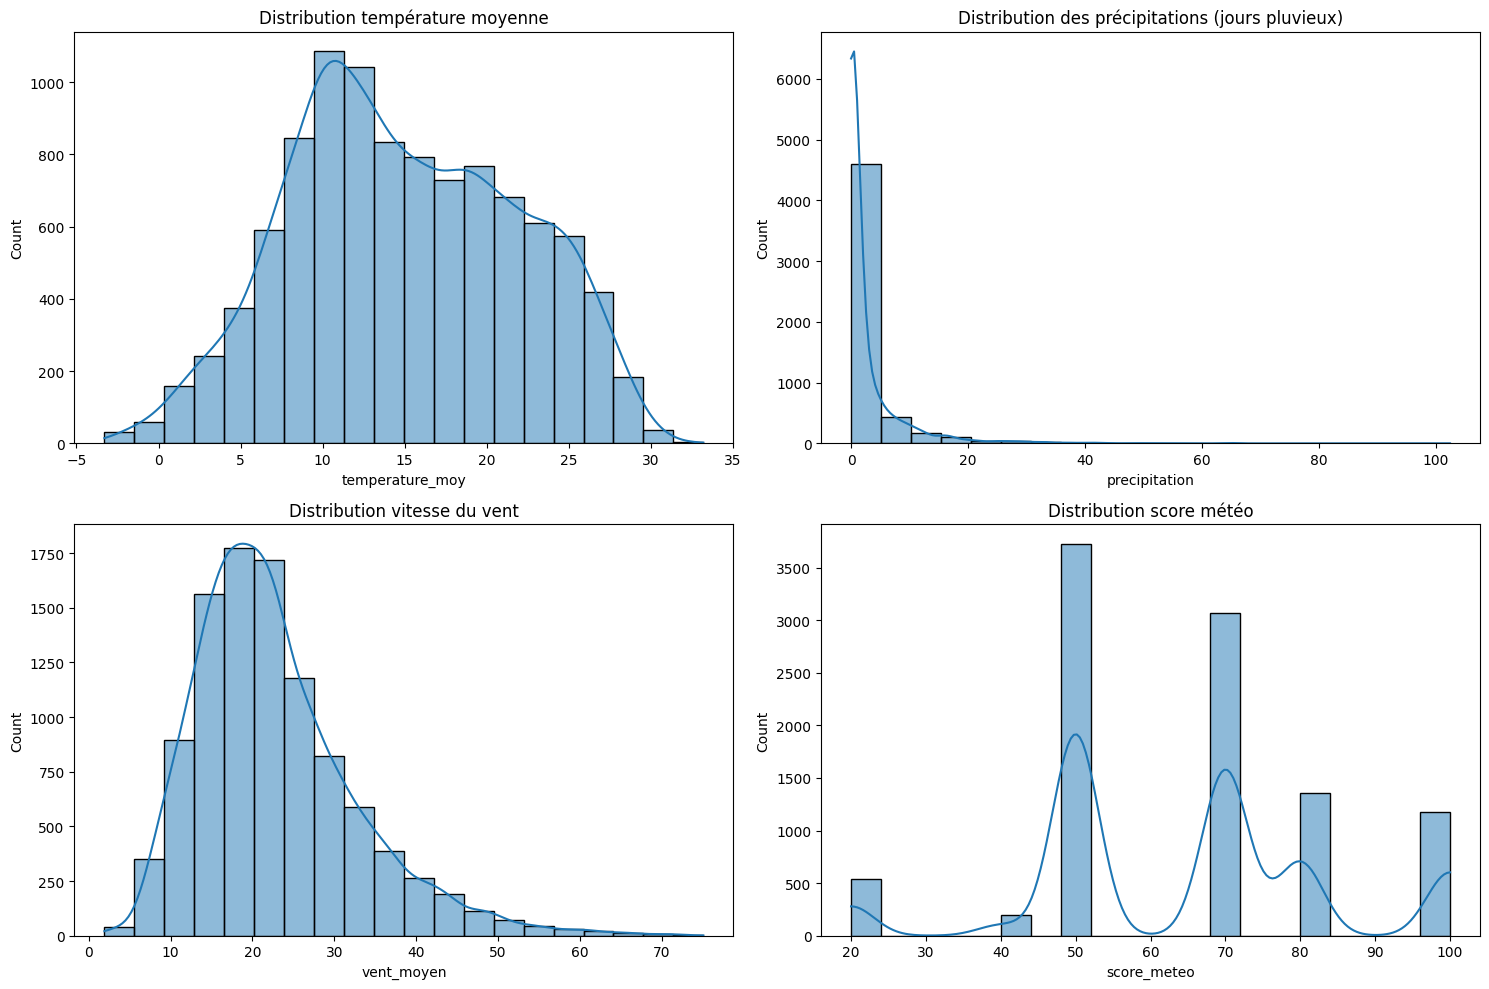

In [11]:
# Configuration des graphiques
plt.figure(figsize=(15, 10))

# Température
plt.subplot(2, 2, 1)
sns.histplot(df['temperature_moy'], bins=20, kde=True)
plt.title('Distribution température moyenne')

# Précipitations
plt.subplot(2, 2, 2)
sns.histplot(df[df['precipitation'] > 0]['precipitation'], bins=20, kde=True)
plt.title('Distribution des précipitations (jours pluvieux)')

# Vent
plt.subplot(2, 2, 3)
sns.histplot(df['vent_moyen'], bins=20, kde=True)
plt.title('Distribution vitesse du vent')

# Score météo
plt.subplot(2, 2, 4)
sns.histplot(df['score_meteo'], bins=20, kde=True)
plt.title('Distribution score météo')

plt.tight_layout()
plt.show()

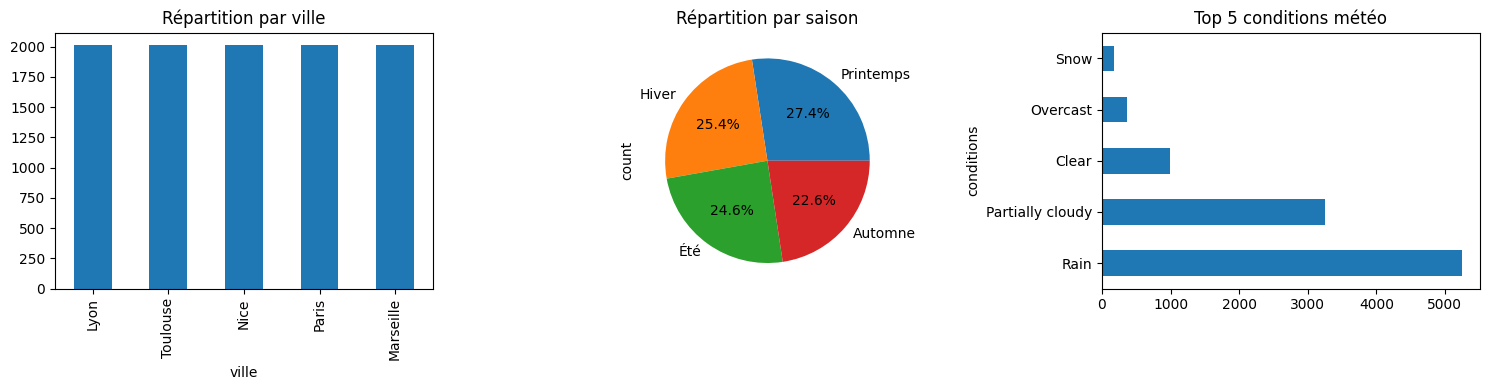

In [12]:
plt.figure(figsize=(15, 4))

# Villes
plt.subplot(1, 3, 1)
df['ville'].value_counts().plot(kind='bar')
plt.title('Répartition par ville')

# Saisons
plt.subplot(1, 3, 2)
df['saison'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition par saison')

# Conditions météo
plt.subplot(1, 3, 3)
df['conditions'].value_counts().head(5).plot(kind='barh')
plt.title('Top 5 conditions météo')

plt.tight_layout()
plt.show()

In [13]:
# Cohérence de temp_ideale
incoherent_temp = df[(df['temp_ideale'] == True) & 
                    ((df['temperature_moy'] < 20) | (df['temperature_moy'] > 30))]
print(f"Jours marqués 'temp_ideale' incohérents : {len(incoherent_temp)}")

# Vérification du score
print("\nExemple de calcul de score :")
sample = df.sample(1)
print(f"Temp idéale: {sample['temp_ideale'].values[0]} → {30 if sample['temp_ideale'].values[0] else 0} pts")
print(f"Peu de pluie: {sample['peu_pluie'].values[0]} → {30 if sample['peu_pluie'].values[0] else 0} pts")
print(f"Score total: {sample['score_meteo'].values[0]}")

Jours marqués 'temp_ideale' incohérents : 0

Exemple de calcul de score :
Temp idéale: False → 0 pts
Peu de pluie: True → 30 pts
Score total: 70


/tmp/ipykernel_5107/1397127507.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='saison', y='temperature_moy', palette='viridis', order=['Hiver', 'Printemps', 'Été', 'Automne'])


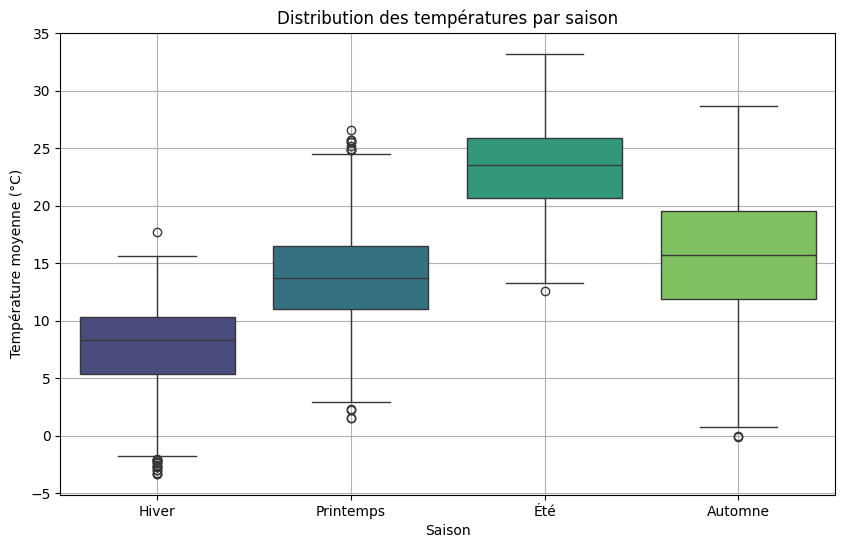

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='saison', y='temperature_moy', palette='viridis', order=['Hiver', 'Printemps', 'Été', 'Automne'])
plt.title('Distribution des températures par saison')
plt.xlabel('Saison')
plt.ylabel('Température moyenne (°C)')
plt.grid(True)
plt.show()

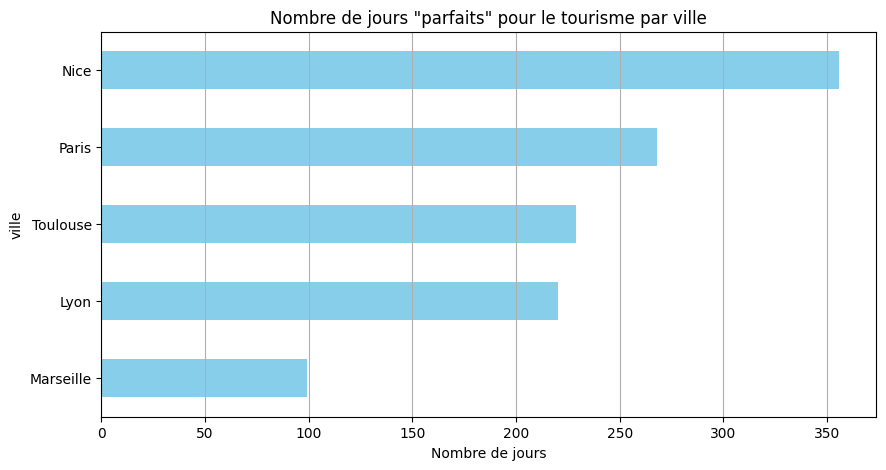

In [15]:
plt.figure(figsize=(10, 5))
df[df['periode_recommandee']].groupby('ville')['periode_recommandee'].count().sort_values().plot(
    kind='barh', color='skyblue'
)
plt.title('Nombre de jours "parfaits" pour le tourisme par ville')
plt.xlabel('Nombre de jours')
plt.grid(axis='x')
plt.show()

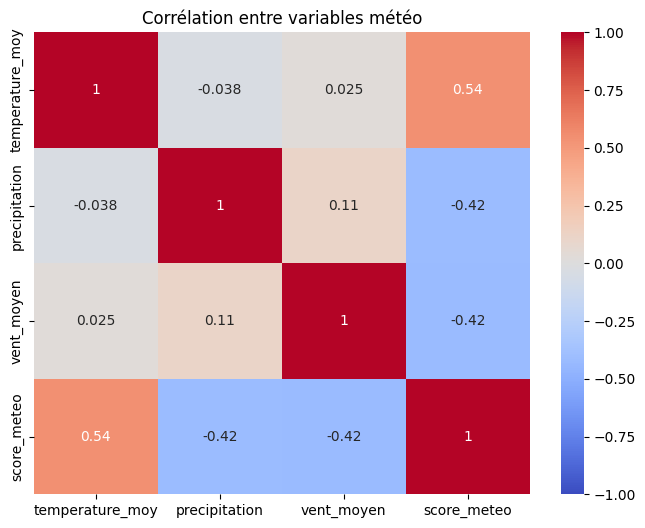

In [16]:
plt.figure(figsize=(8, 6))
corr_matrix = df[['temperature_moy', 'precipitation', 'vent_moyen', 'score_meteo']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Corrélation entre variables météo')
plt.show()

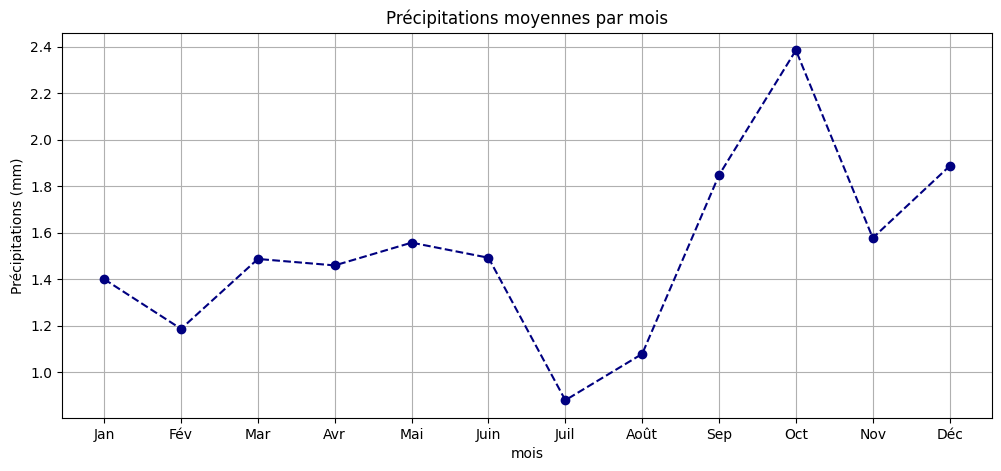

In [17]:
plt.figure(figsize=(12, 5))
df.groupby('mois')['precipitation'].mean().plot(
    marker='o', color='navy', linestyle='--'
)
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.title('Précipitations moyennes par mois')
plt.ylabel('Précipitations (mm)')
plt.grid(True)
plt.show()

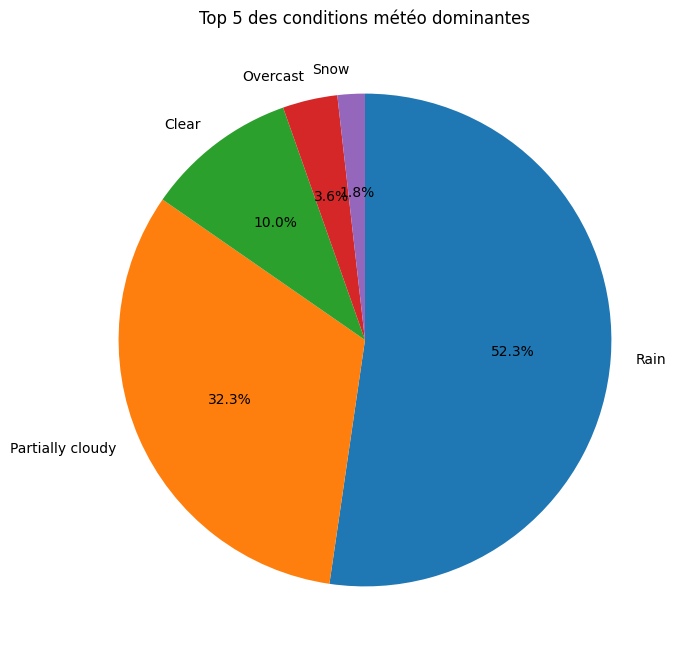

In [18]:
plt.figure(figsize=(8, 8))
df['conditions'].value_counts().head(5).plot(
    kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False
)
plt.title('Top 5 des conditions météo dominantes')
plt.ylabel('')
plt.show()

/tmp/ipykernel_5107/155708605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='periode_recommandee', y='score_meteo', palette='pastel')


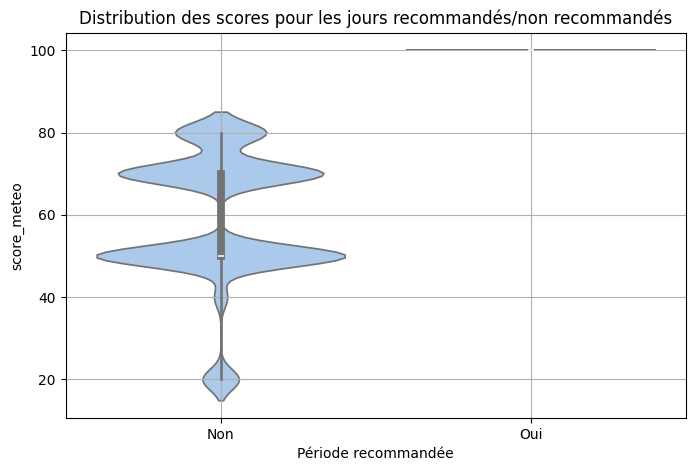

In [19]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='periode_recommandee', y='score_meteo', palette='pastel')
plt.title('Distribution des scores pour les jours recommandés/non recommandés')
plt.xlabel('Période recommandée')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.grid(True)
plt.show()

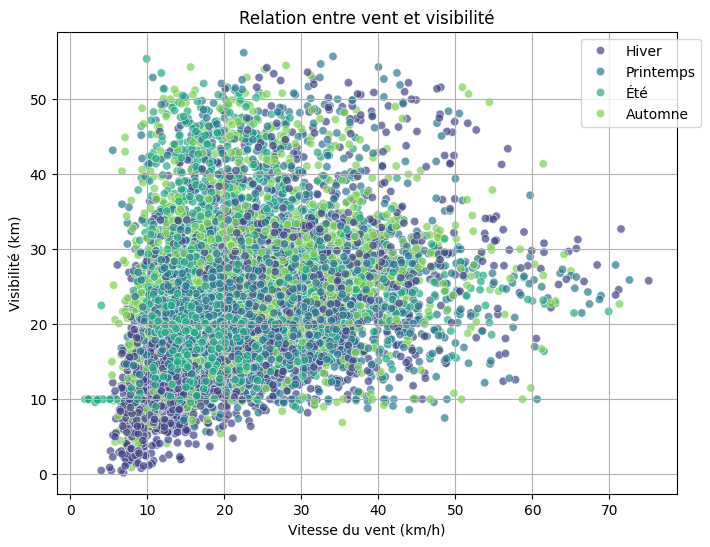

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='vent_moyen', y='visibilite_moy', hue='saison', palette='viridis', alpha=0.7)
plt.title('Relation entre vent et visibilité')
plt.xlabel('Vitesse du vent (km/h)')
plt.ylabel('Visibilité (km)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

Text(0.5, 36.72222222222221, 'Mois')

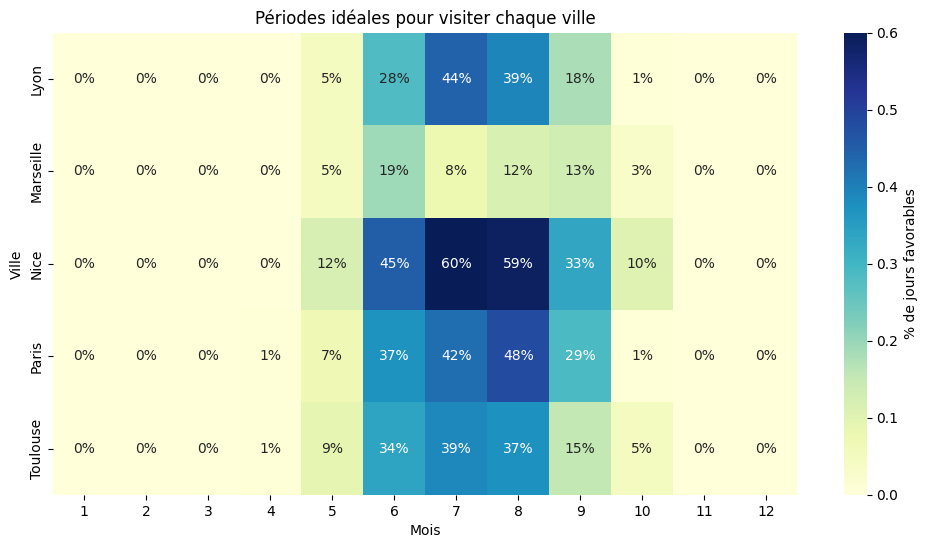

In [22]:
pivot_table = df.pivot_table(index='ville', columns='mois', values='periode_recommandee', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0%', cbar_kws={'label': '% de jours favorables'})
plt.title('Périodes idéales pour visiter chaque ville')
plt.ylabel('Ville')
plt.xlabel('Mois')

(0.0, 100.0)

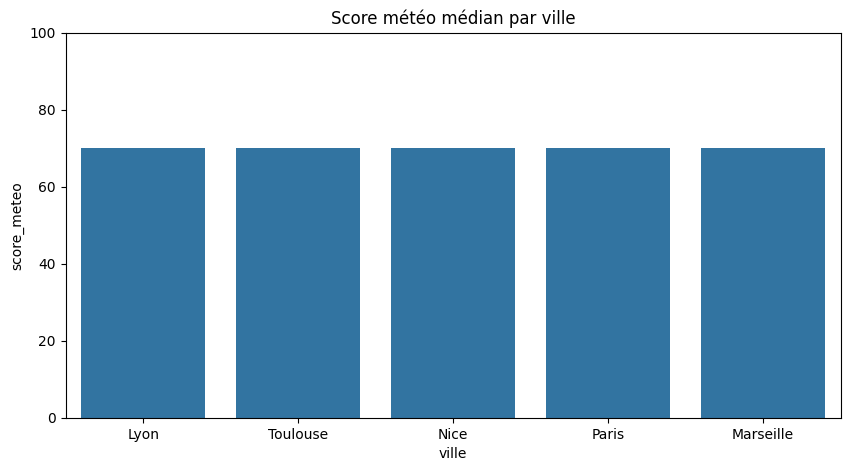

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='ville', y='score_meteo', estimator='median', errorbar=None)
plt.title('Score météo médian par ville')
plt.ylim(0, 100)

Text(0.5, 1.0, 'Conditions moyennes par mois')

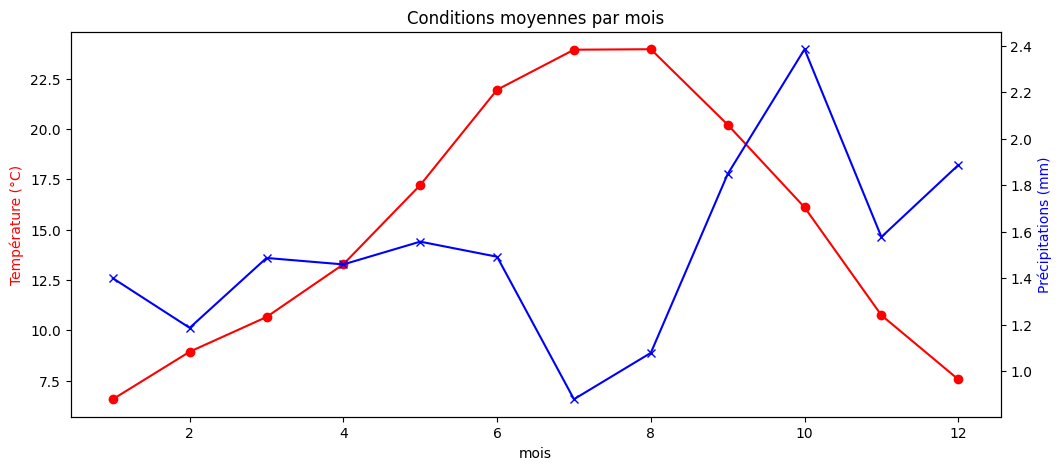

In [24]:
fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()
df.groupby('mois')['temperature_moy'].mean().plot(ax=ax1, color='red', marker='o', label='Température')
df.groupby('mois')['precipitation'].mean().plot(ax=ax2, color='blue', marker='x', label='Précipitations')
ax1.set_ylabel('Température (°C)', color='red')
ax2.set_ylabel('Précipitations (mm)', color='blue')
plt.title('Conditions moyennes par mois')